In [174]:
import os
import re
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold

# Data processing and feature selection
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,StackingRegressor
ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Model selection
from sklearn import metrics
from sklearn.model_selection import cross_validate, ShuffleSplit, cross_val_score, GridSearchCV, RandomizedSearchCV

In [2]:
os.chdir("C://Users/htche/Desktop/project")

In [3]:
df_train = pd.read_csv("practice_train.csv") 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11588 entries, 0 to 11587
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PropertyID          11588 non-null  int64  
 1   SaleDollarCnt       11588 non-null  float64
 2   TransDate           11588 non-null  object 
 3   censusblockgroup    11588 non-null  float64
 4   ZoneCodeCounty      11588 non-null  object 
 5   Usecode             11588 non-null  int64  
 6   BedroomCnt          11588 non-null  float64
 7   BathroomCnt         11588 non-null  float64
 8   FinishedSquareFeet  11588 non-null  float64
 9   GarageSquareFeet    8747 non-null   float64
 10  LotSizeSquareFeet   11588 non-null  int64  
 11  StoryCnt            11588 non-null  float64
 12  BuiltYear           11588 non-null  float64
 13  ViewType            2632 non-null   float64
 14  Latitude            11588 non-null  int64  
 15  Longitude           11588 non-null  int64  
 16  BGMe

In [4]:
df_train.head()

,PropertyID,SaleDollarCnt,TransDate,censusblockgroup,ZoneCodeCounty,Usecode,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,...,Latitude,Longitude,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge
0,48648941,285000.0,5/23/2015,5.300000e+11,R7,9,4.0,2.00,1900.0,480.0,...,47321389,-122213716,107800.0,844.0,1975.0,0.6685,0.0780,42854,0.1924,48.6
1,48648982,309950.0,8/22/2015,5.300000e+11,R8P,9,3.0,2.00,2170.0,320.0,...,47482082,-122244269,181500.0,925.0,1969.0,0.5753,0.0192,54013,0.3718,42.6
2,48649024,476000.0,8/27/2015,5.300000e+11,SF 7200,9,4.0,1.00,2150.0,590.0,...,47561383,-122308083,344300.0,733.0,1946.0,0.6331,0.0000,56782,0.3207,40.7
3,48649040,324950.0,7/1/2015,5.300000e+11,R1,9,4.0,2.25,2560.0,NaN,...,47387929,-122279389,284200.0,900.0,1977.0,0.5456,0.0573,44200,0.3359,40.0
4,48649057,325000.0,6/20/2015,5.300000e+11,LDR,9,4.0,1.75,1720.0,NaN,...,47477068,-122263852,290100.0,802.0,1972.0,0.4267,0.0551,65282,0.1633,44.4


In [5]:
df_train.isna().sum()

PropertyID               0
SaleDollarCnt            0
TransDate                0
censusblockgroup         0
ZoneCodeCounty           0
Usecode                  0
BedroomCnt               0
BathroomCnt              0
FinishedSquareFeet       0
GarageSquareFeet      2841
LotSizeSquareFeet        0
StoryCnt                 0
BuiltYear                0
ViewType              8956
Latitude                 0
Longitude                0
BGMedHomeValue           6
BGMedRent             2631
BGMedYearBuilt         247
BGPctOwn                 0
BGPctVacant              0
BGMedIncome              0
BGPctKids                0
BGMedAge                 0
dtype: int64

In [6]:
df_test = pd.read_csv("practice_test.csv") 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PropertyID          4402 non-null   int64  
 1   SaleDollarCnt       0 non-null      float64
 2   TransDate           4402 non-null   object 
 3   censusblockgroup    4402 non-null   float64
 4   ZoneCodeCounty      4402 non-null   object 
 5   Usecode             4402 non-null   int64  
 6   BedroomCnt          4402 non-null   float64
 7   BathroomCnt         4402 non-null   float64
 8   FinishedSquareFeet  4402 non-null   int64  
 9   GarageSquareFeet    3264 non-null   float64
 10  LotSizeSquareFeet   4402 non-null   int64  
 11  StoryCnt            4402 non-null   float64
 12  BuiltYear           4402 non-null   float64
 13  ViewType            998 non-null    float64
 14  Latitude            4402 non-null   int64  
 15  Longitude           4402 non-null   int64  
 16  BGMedH

In [7]:
df_test.head()

,PropertyID,SaleDollarCnt,TransDate,censusblockgroup,ZoneCodeCounty,Usecode,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,...,Latitude,Longitude,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge
0,48735321,NaN,10/31/2015,5.300000e+11,SF 9600,9,5.0,4.0,5540,NaN,...,47725642,-122283771,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6
1,48735471,NaN,11/6/2015,5.300000e+11,SF 9600,9,5.0,3.0,2470,510.0,...,47726993,-122281969,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6
2,49128764,NaN,10/17/2015,5.300000e+11,SF 7200,9,4.0,2.0,1680,NaN,...,47731749,-122289304,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6
3,48897535,NaN,11/19/2015,5.300000e+11,SF 7200,9,2.0,1.0,990,260.0,...,47728810,-122289224,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6
4,49083957,NaN,12/15/2015,5.300000e+11,SF 9600,9,4.0,3.0,2960,550.0,...,47731170,-122282684,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6


In [8]:
df_test.isna().sum()

PropertyID               0
SaleDollarCnt         4402
TransDate                0
censusblockgroup         0
ZoneCodeCounty           0
Usecode                  0
BedroomCnt               0
BathroomCnt              0
FinishedSquareFeet       0
GarageSquareFeet      1138
LotSizeSquareFeet        0
StoryCnt                 0
BuiltYear                0
ViewType              3404
Latitude                 0
Longitude                0
BGMedHomeValue           7
BGMedRent              963
BGMedYearBuilt          62
BGPctOwn                 0
BGPctVacant              0
BGMedIncome              0
BGPctKids                0
BGMedAge                 0
dtype: int64

### Missing data explore and impute

In [9]:
# Function to calculate missing values by column 
def missing_values_table(df):
        # Total missing values
        mis_value = df.isnull().sum()
        
        # Percentage of missing values
        mis_value_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_value_table = pd.concat([mis_value, mis_value_percent], axis=1)
        # Rename the columns
        mis_value_table_rename_columns = mis_value_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_value_table_rename_columns = mis_value_table_rename_columns[
            mis_value_table_rename_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_value_table_rename_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_value_table_rename_columns

In [10]:
missing_values_table(df_train)

Your selected dataframe has 24 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
ViewType,8956,77.3
GarageSquareFeet,2841,24.5
BGMedRent,2631,22.7
BGMedYearBuilt,247,2.1
BGMedHomeValue,6,0.1


In [11]:
missing_values_table(df_test)

Your selected dataframe has 24 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
SaleDollarCnt,4402,100.0
ViewType,3404,77.3
GarageSquareFeet,1138,25.9
BGMedRent,963,21.9
BGMedYearBuilt,62,1.4
BGMedHomeValue,7,0.2


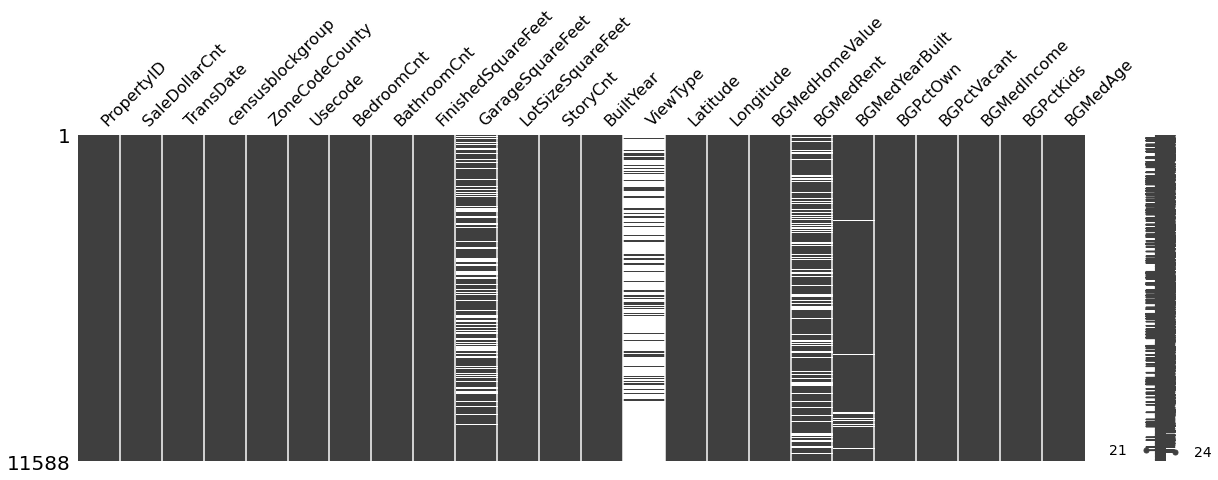

In [12]:
import missingno as mno
mno.matrix(df_train, figsize = (20, 6))

In [13]:
df_train['BGMedHomeValue'].value_counts()

1000001.0    208
431300.0      72
396900.0      65
528700.0      62
350000.0      61
            ... 
428900.0       1
219100.0       1
130500.0       1
157100.0       1
208900.0       1
Name: BGMedHomeValue, Length: 1099, dtype: int64

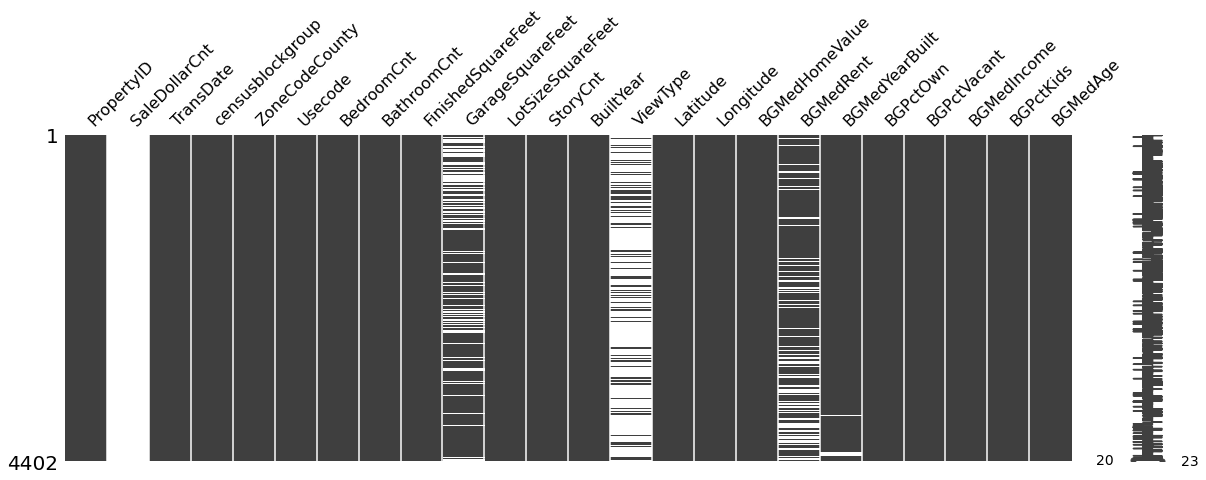

In [14]:
import missingno as mno
mno.matrix(df_test, figsize = (20, 6))

In [15]:
#create age column (TransDate year-BuiltYear) for train & test set
import datetime as dt
df_train['year_sale'] = pd.DatetimeIndex(df_train['TransDate']).year
df_test['year_sale'] = pd.DatetimeIndex(df_test['TransDate']).year
df_train['age'] = df_train['year_sale']-df_train['BuiltYear']
df_test['age'] = df_test['year_sale']-df_test['BuiltYear']

In [16]:
df_train.head()

,PropertyID,SaleDollarCnt,TransDate,censusblockgroup,ZoneCodeCounty,Usecode,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,...,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge,year_sale,age
0,48648941,285000.0,5/23/2015,5.300000e+11,R7,9,4.0,2.00,1900.0,480.0,...,107800.0,844.0,1975.0,0.6685,0.0780,42854,0.1924,48.6,2015,50.0
1,48648982,309950.0,8/22/2015,5.300000e+11,R8P,9,3.0,2.00,2170.0,320.0,...,181500.0,925.0,1969.0,0.5753,0.0192,54013,0.3718,42.6,2015,62.0
2,48649024,476000.0,8/27/2015,5.300000e+11,SF 7200,9,4.0,1.00,2150.0,590.0,...,344300.0,733.0,1946.0,0.6331,0.0000,56782,0.3207,40.7,2015,60.0
3,48649040,324950.0,7/1/2015,5.300000e+11,R1,9,4.0,2.25,2560.0,NaN,...,284200.0,900.0,1977.0,0.5456,0.0573,44200,0.3359,40.0,2015,53.0
4,48649057,325000.0,6/20/2015,5.300000e+11,LDR,9,4.0,1.75,1720.0,NaN,...,290100.0,802.0,1972.0,0.4267,0.0551,65282,0.1633,44.4,2015,67.0


In [17]:
df_test.head()

,PropertyID,SaleDollarCnt,TransDate,censusblockgroup,ZoneCodeCounty,Usecode,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,...,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge,year_sale,age
0,48735321,NaN,10/31/2015,5.300000e+11,SF 9600,9,5.0,4.0,5540,NaN,...,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6,2015,75.0
1,48735471,NaN,11/6/2015,5.300000e+11,SF 9600,9,5.0,3.0,2470,510.0,...,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6,2015,49.0
2,49128764,NaN,10/17/2015,5.300000e+11,SF 7200,9,4.0,2.0,1680,NaN,...,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6,2015,87.0
3,48897535,NaN,11/19/2015,5.300000e+11,SF 7200,9,2.0,1.0,990,260.0,...,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6,2015,75.0
4,49083957,NaN,12/15/2015,5.300000e+11,SF 9600,9,4.0,3.0,2960,550.0,...,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6,2015,64.0


In [18]:
#drop columns: 
#Usecode - almost every observation has the same usecodes and censusblockgroups
#censusblockgroup - almost every observation has the same usecodes and censusblockgroups
#ViewType- missing value 77%
#BGMedYearBuilt- we already have year built
#Dropping the following columns in both train and test set
df_train.drop(['Usecode', 'censusblockgroup', 'ViewType', 'BGMedYearBuilt', 'year_sale'], axis=1, inplace = True)
df_test.drop(['Usecode', 'censusblockgroup', 'ViewType', 'BGMedYearBuilt','year_sale'], axis=1, inplace = True)

In [19]:
# impute missing value-BGMedHomeValue by using mean for train & test set
df_train['BGMedHomeValue'] = df_train['BGMedHomeValue'].fillna(df_train['BGMedHomeValue'].mean())
df_test['BGMedHomeValue'] = df_test['BGMedHomeValue'].fillna(df_test['BGMedHomeValue'].mean())

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11588 entries, 0 to 11587
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PropertyID          11588 non-null  int64  
 1   SaleDollarCnt       11588 non-null  float64
 2   TransDate           11588 non-null  object 
 3   ZoneCodeCounty      11588 non-null  object 
 4   BedroomCnt          11588 non-null  float64
 5   BathroomCnt         11588 non-null  float64
 6   FinishedSquareFeet  11588 non-null  float64
 7   GarageSquareFeet    8747 non-null   float64
 8   LotSizeSquareFeet   11588 non-null  int64  
 9   StoryCnt            11588 non-null  float64
 10  BuiltYear           11588 non-null  float64
 11  Latitude            11588 non-null  int64  
 12  Longitude           11588 non-null  int64  
 13  BGMedHomeValue      11588 non-null  float64
 14  BGMedRent           8957 non-null   float64
 15  BGPctOwn            11588 non-null  float64
 16  BGPc

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PropertyID          4402 non-null   int64  
 1   SaleDollarCnt       0 non-null      float64
 2   TransDate           4402 non-null   object 
 3   ZoneCodeCounty      4402 non-null   object 
 4   BedroomCnt          4402 non-null   float64
 5   BathroomCnt         4402 non-null   float64
 6   FinishedSquareFeet  4402 non-null   int64  
 7   GarageSquareFeet    3264 non-null   float64
 8   LotSizeSquareFeet   4402 non-null   int64  
 9   StoryCnt            4402 non-null   float64
 10  BuiltYear           4402 non-null   float64
 11  Latitude            4402 non-null   int64  
 12  Longitude           4402 non-null   int64  
 13  BGMedHomeValue      4402 non-null   float64
 14  BGMedRent           3439 non-null   float64
 15  BGPctOwn            4402 non-null   float64
 16  BGPctV

In [22]:
#correlation plot A
import matplotlib.pyplot as plt
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,PropertyID,SaleDollarCnt,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet,StoryCnt,BuiltYear,Latitude,Longitude,BGMedHomeValue,BGMedRent,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge,age
PropertyID,1.000000,0.024807,0.153932,0.252908,0.209872,0.059313,-0.053028,0.318477,0.468018,-0.076319,0.142763,-0.070133,0.026151,0.028997,0.013874,0.023011,0.139690,-0.121188,-0.468018
SaleDollarCnt,0.024807,1.000000,0.310897,0.506672,0.678446,0.302776,0.067874,0.267300,0.139941,0.317772,-0.020657,0.681865,0.265245,0.094028,0.010543,0.427578,-0.028768,0.173956,-0.139941
BedroomCnt,0.153932,0.310897,1.000000,0.547931,0.595376,0.228079,0.034032,0.306282,0.289578,0.019182,0.107009,0.185306,0.132048,0.126537,-0.037825,0.203819,0.122363,0.022350,-0.289578
BathroomCnt,0.252908,0.506672,0.547931,1.000000,0.770779,0.400243,0.107850,0.475484,0.562734,0.023533,0.232815,0.316754,0.221504,0.201332,-0.012473,0.352881,0.181858,0.060423,-0.562734
FinishedSquareFeet,0.209872,0.678446,0.595376,0.770779,1.000000,0.502610,0.168457,0.460839,0.443782,0.094316,0.205698,0.451525,0.251207,0.214079,-0.015851,0.421043,0.150903,0.126701,-0.443782
GarageSquareFeet,0.059313,0.302776,0.228079,0.400243,0.502610,1.000000,0.233859,0.292994,0.338078,-0.018814,0.289252,0.214609,0.162084,0.206806,0.007935,0.271847,0.150556,0.093346,-0.338078
LotSizeSquareFeet,-0.053028,0.067874,0.034032,0.107850,0.168457,0.233859,1.000000,0.020360,0.059666,-0.082586,0.209834,0.042776,-0.027858,0.125225,0.013974,0.054269,0.003284,0.128735,-0.059666
StoryCnt,0.318477,0.267300,0.306282,0.475484,0.460839,0.292994,0.020360,1.000000,0.387169,0.000828,0.166766,0.181713,0.104221,0.062497,0.002787,0.212164,0.172151,-0.082155,-0.387169
BuiltYear,0.468018,0.139941,0.289578,0.562734,0.443782,0.338078,0.059666,0.387169,1.000000,-0.164853,0.421663,-0.002179,0.197861,0.234920,-0.010501,0.213867,0.320432,-0.053678,-1.000000
Latitude,-0.076319,0.317772,0.019182,0.023533,0.094316,-0.018814,-0.082586,0.000828,-0.164853,1.000000,-0.119193,0.438799,0.178333,-0.041684,-0.052146,0.239937,-0.147922,0.093957,0.164853


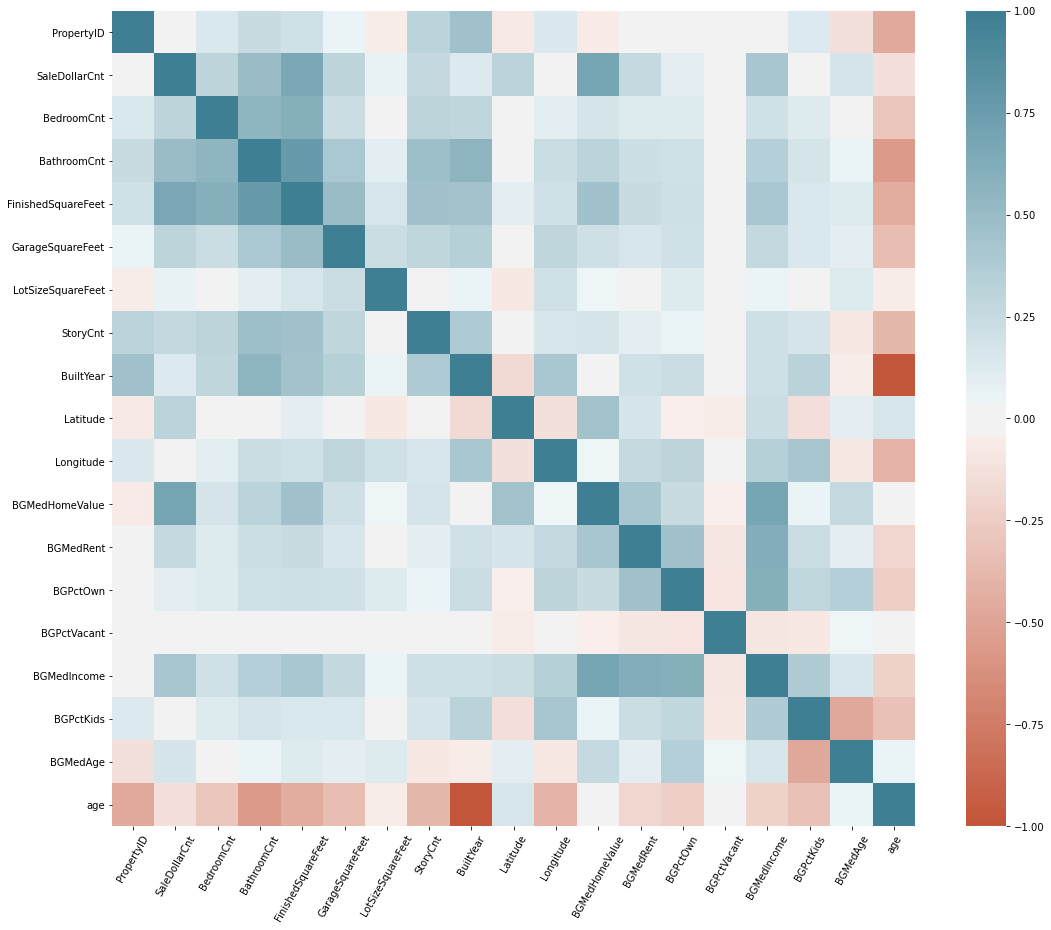

In [23]:
#correlation plot B
fig, ax = plt.subplots(figsize = (18,15))
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
plt.show()

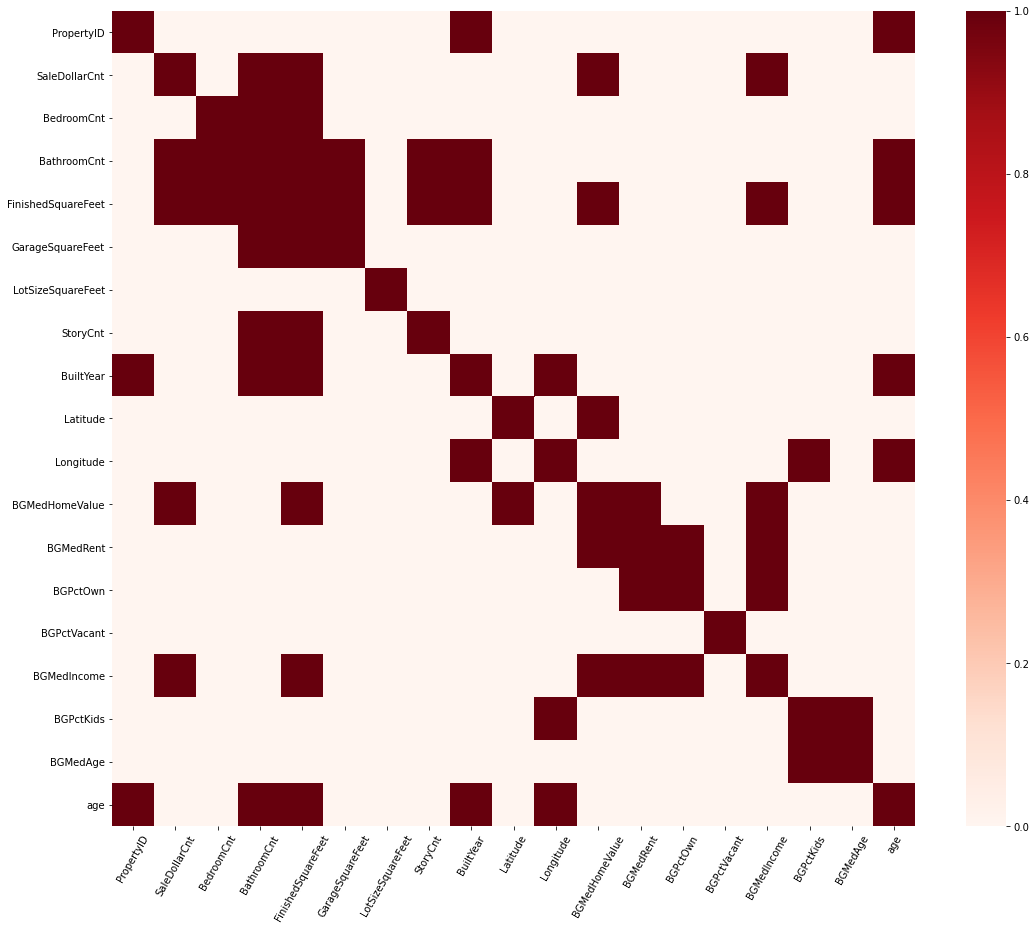

In [24]:
# visualize the strong linear associations- map relationships that have a correlation above a certain value (in this case, we will use an absolute value of 0.4)
fig, ax = plt.subplots(figsize = (18,15))
train_corr = abs(df_train.corr())
sns.heatmap(train_corr > 0.4, cmap=plt.cm.Reds)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
plt.show()

In [25]:
df_train1=df_train.copy()
df_train2=df_train.copy()
df_test1=df_test.copy()
df_test2=df_test.copy()

#### Method A: Interpolate method- df_train1 & df_test1

In [26]:
# Method A:Interpolate method
# impute missing value-GarageSquareFeet & BGMedRent by using interpolate method
df_train1['GarageSquareFeet'].interpolate(method='linear', direction = 'forward', inplace=True) 
df_train1['BGMedRent'].interpolate(method='linear', direction = 'forward', inplace=True) 
df_test1['GarageSquareFeet'].interpolate(method='linear', direction = 'forward', inplace=True) 
df_test1['BGMedRent'].interpolate(method='linear', direction = 'forward', inplace=True) 

In [27]:
print(df_test1['GarageSquareFeet'].head(10))
print(df_test1['BGMedRent'].head(10))

0      NaN
1    510.0
2    385.0
3    260.0
4    550.0
5    400.0
6    395.0
7    390.0
8    260.0
9    285.0
Name: GarageSquareFeet, dtype: float64
0    1750.0
1    1750.0
2    1750.0
3    1750.0
4    1750.0
5     768.0
6    1598.0
7     830.0
8     830.0
9     917.0
Name: BGMedRent, dtype: float64


In [28]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11588 entries, 0 to 11587
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PropertyID          11588 non-null  int64  
 1   SaleDollarCnt       11588 non-null  float64
 2   TransDate           11588 non-null  object 
 3   ZoneCodeCounty      11588 non-null  object 
 4   BedroomCnt          11588 non-null  float64
 5   BathroomCnt         11588 non-null  float64
 6   FinishedSquareFeet  11588 non-null  float64
 7   GarageSquareFeet    11588 non-null  float64
 8   LotSizeSquareFeet   11588 non-null  int64  
 9   StoryCnt            11588 non-null  float64
 10  BuiltYear           11588 non-null  float64
 11  Latitude            11588 non-null  int64  
 12  Longitude           11588 non-null  int64  
 13  BGMedHomeValue      11588 non-null  float64
 14  BGMedRent           11588 non-null  float64
 15  BGPctOwn            11588 non-null  float64
 16  BGPc

In [29]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PropertyID          4402 non-null   int64  
 1   SaleDollarCnt       0 non-null      float64
 2   TransDate           4402 non-null   object 
 3   ZoneCodeCounty      4402 non-null   object 
 4   BedroomCnt          4402 non-null   float64
 5   BathroomCnt         4402 non-null   float64
 6   FinishedSquareFeet  4402 non-null   int64  
 7   GarageSquareFeet    4401 non-null   float64
 8   LotSizeSquareFeet   4402 non-null   int64  
 9   StoryCnt            4402 non-null   float64
 10  BuiltYear           4402 non-null   float64
 11  Latitude            4402 non-null   int64  
 12  Longitude           4402 non-null   int64  
 13  BGMedHomeValue      4402 non-null   float64
 14  BGMedRent           4402 non-null   float64
 15  BGPctOwn            4402 non-null   float64
 16  BGPctV

In [30]:
# Since in test set, the GarageSquareFeet the first and last row is NA, the index 0 can't be imputed, so we use mean to impute index 0/  
df_test1['GarageSquareFeet'] = df_test1['GarageSquareFeet'].fillna(df_test['GarageSquareFeet'].mean())

In [31]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PropertyID          4402 non-null   int64  
 1   SaleDollarCnt       0 non-null      float64
 2   TransDate           4402 non-null   object 
 3   ZoneCodeCounty      4402 non-null   object 
 4   BedroomCnt          4402 non-null   float64
 5   BathroomCnt         4402 non-null   float64
 6   FinishedSquareFeet  4402 non-null   int64  
 7   GarageSquareFeet    4402 non-null   float64
 8   LotSizeSquareFeet   4402 non-null   int64  
 9   StoryCnt            4402 non-null   float64
 10  BuiltYear           4402 non-null   float64
 11  Latitude            4402 non-null   int64  
 12  Longitude           4402 non-null   int64  
 13  BGMedHomeValue      4402 non-null   float64
 14  BGMedRent           4402 non-null   float64
 15  BGPctOwn            4402 non-null   float64
 16  BGPctV

#### Method B: Missing Data Imputation using Regression - df_train2 & df_test2

In [32]:
# Method B:Run a linear regression model to predict the missing NA's in BGMedRent- TRAIN SET
#Making the train data with no NA's
traina = df_train2[(df_train2.BGMedRent.notna())]
#Making the test set with the observations that have NA's
testa = df_train2[df_train2.BGMedRent.isna()]

#Dividing the test set into target and explanatory variables
testa_y = testa['BGMedHomeValue'].reset_index(name='BGMedHomeValue').drop(columns='index')
testa_x = testa.loc[:, testa.columns != 'BGMedRent'].drop(columns=['TransDate','PropertyID', 'ZoneCodeCounty',
                                                                   'SaleDollarCnt', 'BuiltYear', 'GarageSquareFeet'])

#Dividing the train set into target and explanatory variables
y = traina['BGMedHomeValue'].reset_index(name='BGMedHomeValue').drop(columns='index')
x = traina.loc[:, traina.columns != 'BGMedRent'].drop(columns=['TransDate','PropertyID', 'ZoneCodeCounty',
                                                             'SaleDollarCnt', 'BuiltYear', 'GarageSquareFeet'])

#Using train-test-split to divide the training data into train and validation
x_train, x_test, y_train, y_test = train_test_split(x, y)

#Using Linear Regression
reg = LinearRegression()
reg.fit(x_train, y_train)
predict = reg.predict(x_test)

print('The mean absolute error is:', metrics.mean_absolute_error(y_test, predict))
print('The root mean square error is:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

#Predicting the values of the validation set
predict_test = reg.predict(testa_x)
indexes = df_train2[df_train2['BGMedRent'].isna()].index.values

#Putting the values in the indexes where the NA's are present
for i, element in enumerate(indexes):
    df_train2.iloc[element, 14] = predict_test[i]

The mean absolute error is: 9.401576660041298e-11
The root mean square error is: 1.2387533428680052e-10


In [33]:
# Method B:Run a linear regression model to predict the missing NA's  in BGMedRent- TEST SET
#Making the train data with no NA's
traina = df_test2[(df_test2.BGMedRent.notna())]
#Making the test set with the observations that have NA's
testa = df_test2[df_test2.BGMedRent.isna()]

#Dividing the test set into target and explanatory variables
testa_y = testa['BGMedHomeValue'].reset_index(name='BGMedHomeValue').drop(columns='index')
testa_x = testa.loc[:, testa.columns != 'BGMedRent'].drop(columns=['TransDate','PropertyID', 'ZoneCodeCounty',
                                                                   'SaleDollarCnt', 'BuiltYear', 'GarageSquareFeet'])

#Dividing the train set into target and explanatory variables
y = traina['BGMedHomeValue'].reset_index(name='BGMedHomeValue').drop(columns='index')
x = traina.loc[:, traina.columns != 'BGMedRent'].drop(columns=['TransDate','PropertyID', 'ZoneCodeCounty',
                                                             'SaleDollarCnt', 'BuiltYear', 'GarageSquareFeet'])

#Using train-test-split to divide the training data into train and validation
x_train, x_test, y_train, y_test = train_test_split(x, y)

#Using Linear Regression
reg = LinearRegression()
reg.fit(x_train, y_train)
predict = reg.predict(x_test)

print('The mean absolute error is:', metrics.mean_absolute_error(y_test, predict))
print('The root mean square error is:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

#Predicting the values of the validation set
predict_test = reg.predict(testa_x)
indexes = df_test2[df_test2['BGMedRent'].isna()].index.values

#Putting the values in the indexes where the NA's are present
for i, element in enumerate(indexes):
    df_test2.iloc[element, 14] = predict_test[i]

The mean absolute error is: 8.484104994771093e-11
The root mean square error is: 1.145561048144162e-10


In [34]:
# Method B:Run a linear regression model to predict the missing NA's in GarageSquareFeet- TRAIN SET
#Making the train data with no NA's
traina = df_train2[(df_train2.GarageSquareFeet.notna())]
#Making the test set with the observations that have NA's
testa = df_train2[df_train2.GarageSquareFeet.isna()]

#Dividing the test set into target and explanatory variables
testa_y = testa['BGMedHomeValue'].reset_index(name='BGMedHomeValue').drop(columns='index')
testa_x = testa.loc[:, testa.columns != 'GarageSquareFeet'].drop(columns=['TransDate','PropertyID', 'ZoneCodeCounty',
                                                                   'SaleDollarCnt', 'BuiltYear', 'BGMedRent'])

#Dividing the train set into target and explanatory variables
y = traina['BGMedHomeValue'].reset_index(name='BGMedHomeValue').drop(columns='index')
x = traina.loc[:, traina.columns != 'GarageSquareFeet'].drop(columns=['TransDate','PropertyID', 'ZoneCodeCounty',
                                                             'SaleDollarCnt', 'BuiltYear', 'BGMedRent'])

#Using train-test-split to divide the training data into train and validation
x_train, x_test, y_train, y_test = train_test_split(x, y)

#Using Linear Regression
reg = LinearRegression()
reg.fit(x_train, y_train)
predict = reg.predict(x_test)

print('The mean absolute error is:', metrics.mean_absolute_error(y_test, predict))
print('The root mean square error is:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

#Predicting the values of the validation set
predict_test = reg.predict(testa_x)
indexes = df_train2[df_train2['GarageSquareFeet'].isna()].index.values

#Putting the values in the indexes where the NA's are present
for i, element in enumerate(indexes):
    df_train2.iloc[element, 7] = predict_test[i]

The mean absolute error is: 1.437924847017018e-10
The root mean square error is: 1.7944239491006858e-10


In [35]:
# Method B:Run a linear regression model to predict the missing NA's in GarageSquareFeet- TRAIN SET
#Making the train data with no NA's
traina = df_test2[(df_test2.GarageSquareFeet.notna())]
#Making the test set with the observations that have NA's
testa = df_test2[df_test2.GarageSquareFeet.isna()]

#Dividing the test set into target and explanatory variables
testa_y = testa['BGMedHomeValue'].reset_index(name='BGMedHomeValue').drop(columns='index')
testa_x = testa.loc[:, testa.columns != 'GarageSquareFeet'].drop(columns=['TransDate','PropertyID', 'ZoneCodeCounty',
                                                                   'SaleDollarCnt', 'BuiltYear', 'BGMedRent'])

#Dividing the train set into target and explanatory variables
y = traina['BGMedHomeValue'].reset_index(name='BGMedHomeValue').drop(columns='index')
x = traina.loc[:, traina.columns != 'GarageSquareFeet'].drop(columns=['TransDate','PropertyID', 'ZoneCodeCounty',
                                                             'SaleDollarCnt', 'BuiltYear', 'BGMedRent'])

#Using train-test-split to divide the training data into train and validation
x_train, x_test, y_train, y_test = train_test_split(x, y)

#Using Linear Regression
reg = LinearRegression()
reg.fit(x_train, y_train)
predict = reg.predict(x_test)

print('The mean absolute error is:', metrics.mean_absolute_error(y_test, predict))
print('The root mean square error is:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

#Predicting the values of the validation set
predict_test = reg.predict(testa_x)
indexes = df_test2[df_test2['GarageSquareFeet'].isna()].index.values

#Putting the values in the indexes where the NA's are present
for i, element in enumerate(indexes):
    df_test2.iloc[element, 7] = predict_test[i]

The mean absolute error is: 9.069980496504143e-11
The root mean square error is: 1.1391409126296521e-10


In [36]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PropertyID          4402 non-null   int64  
 1   SaleDollarCnt       0 non-null      float64
 2   TransDate           4402 non-null   object 
 3   ZoneCodeCounty      4402 non-null   object 
 4   BedroomCnt          4402 non-null   float64
 5   BathroomCnt         4402 non-null   float64
 6   FinishedSquareFeet  4402 non-null   int64  
 7   GarageSquareFeet    4402 non-null   float64
 8   LotSizeSquareFeet   4402 non-null   int64  
 9   StoryCnt            4402 non-null   float64
 10  BuiltYear           4402 non-null   float64
 11  Latitude            4402 non-null   int64  
 12  Longitude           4402 non-null   int64  
 13  BGMedHomeValue      4402 non-null   float64
 14  BGMedRent           4402 non-null   float64
 15  BGPctOwn            4402 non-null   float64
 16  BGPctV

In [37]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11588 entries, 0 to 11587
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PropertyID          11588 non-null  int64  
 1   SaleDollarCnt       11588 non-null  float64
 2   TransDate           11588 non-null  object 
 3   ZoneCodeCounty      11588 non-null  object 
 4   BedroomCnt          11588 non-null  float64
 5   BathroomCnt         11588 non-null  float64
 6   FinishedSquareFeet  11588 non-null  float64
 7   GarageSquareFeet    11588 non-null  float64
 8   LotSizeSquareFeet   11588 non-null  int64  
 9   StoryCnt            11588 non-null  float64
 10  BuiltYear           11588 non-null  float64
 11  Latitude            11588 non-null  int64  
 12  Longitude           11588 non-null  int64  
 13  BGMedHomeValue      11588 non-null  float64
 14  BGMedRent           11588 non-null  float64
 15  BGPctOwn            11588 non-null  float64
 16  BGPc

In [38]:
df_train2['ZoneCodeCounty'].value_counts()

SF 5000    2243
R6         1363
R4         1120
RA5         622
R5          607
           ... 
GDC           1
O             1
TC4           1
CBSO          1
RA10PSO       1
Name: ZoneCodeCounty, Length: 178, dtype: int64

### Data modelling 1: RobustScaler()

In [64]:
df_train2v1=df_train2.copy()
df_test2v1=df_test2.copy()

In [65]:
# Dropping the'PropertyID', 'SaleDollarCnt', 'TransDate', 'BuiltYear' columns
drop_cols = ['PropertyID', 'SaleDollarCnt', 'TransDate', 'BuiltYear']
X = df_train2v1.drop(drop_cols, axis=1)
y = df_train2v1['SaleDollarCnt']

X_t = df_test2v1.drop(drop_cols, axis=1)

print(X.shape, y.shape, X_t.shape)

(11588, 17) (11588,) (4402, 17)


In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11588 entries, 0 to 11587
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZoneCodeCounty      11588 non-null  object 
 1   BedroomCnt          11588 non-null  float64
 2   BathroomCnt         11588 non-null  float64
 3   FinishedSquareFeet  11588 non-null  float64
 4   GarageSquareFeet    11588 non-null  float64
 5   LotSizeSquareFeet   11588 non-null  int64  
 6   StoryCnt            11588 non-null  float64
 7   Latitude            11588 non-null  int64  
 8   Longitude           11588 non-null  int64  
 9   BGMedHomeValue      11588 non-null  float64
 10  BGMedRent           11588 non-null  float64
 11  BGPctOwn            11588 non-null  float64
 12  BGPctVacant         11588 non-null  float64
 13  BGMedIncome         11588 non-null  int64  
 14  BGPctKids           11588 non-null  float64
 15  BGMedAge            11588 non-null  float64
 16  age 

In [67]:
# Determining which columns are numeric and categorical

# Finding the names of the numerical columns
num_cols = X.dtypes[X.dtypes != object].index.to_list()

# Finding the names of the categorical columns
X_cat = X.drop(num_cols, axis=1)
cat_cols = X_cat.columns.to_list()

In [68]:
num_cols

['BedroomCnt',
 'BathroomCnt',
 'FinishedSquareFeet',
 'GarageSquareFeet',
 'LotSizeSquareFeet',
 'StoryCnt',
 'Latitude',
 'Longitude',
 'BGMedHomeValue',
 'BGMedRent',
 'BGPctOwn',
 'BGPctVacant',
 'BGMedIncome',
 'BGPctKids',
 'BGMedAge',
 'age']

In [69]:
cat_cols

['ZoneCodeCounty']

In [70]:
# Build  pipeline for numerical data-use RobustScaler here because it works well with outliers. 
num_pipeline = Pipeline([('robust_scaler', RobustScaler())])

In [71]:
# Build  pipeline for categorical data-use one hot encoding because the categorical values are currently encoded as strings, and the OneHotEncoder will create a new column for each category, allowing our models to take advantage of the categorical information.
cat_pipeline = Pipeline([('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
                         # Ignore unknowns in case the train set contains categories not found in the test set
])

In [72]:
full_pipeline = ColumnTransformer([
                                   ('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)
])

In [73]:
X = full_pipeline.fit_transform(X)
X_t = full_pipeline.transform(X_t)

print('X shape: {}'.format(X.shape))
print('X_t shape: {}'.format(X_t.shape))

X shape: (11588, 194)
X_t shape: (4402, 194)


In [74]:
#Two empty lists are initialized for storing the results
aape, mape = [], []

#Used linear_regession
linear_reg = LinearRegression()

#Kfold cross validation is used with 10 splits
cv = KFold(n_splits=10, random_state=123, shuffle=False)

#Going over every iteration and fitted and predicted the values in every iteration
for train_index, validation_index in cv.split(X):
    X_train, X_validation, y_train, y_validation = X[train_index], X[validation_index], y[train_index], y[validation_index]
    linear_reg.fit(X_train, y_train)
    predicted = linear_reg.predict(X_validation)
    aape.append((abs(predicted - y_validation)/y_validation).mean())
    mape.append((abs(predicted - y_validation)/y_validation).median())
    
print('AAPE for linear regression is:', np.mean(aape))
print('MAPE for linear regression is:', np.median(mape))

C:\Users\htche\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


AAPE for linear regression is: 0.2500211246957168
MAPE for linear regression is: 0.18743741021896687


In [75]:
# Modelling

models = []
# Linear regression
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('SGD', SGDRegressor()))
models.append(('Lasso', Lasso()))
# Ensemble methods
models.append(('RandomForest', RandomForestRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('ExtraTrees', ExtraTreesRegressor()))
# KNN
models.append(('KNN',  KNeighborsRegressor()))
# Decision Trees
models.append(('DecisionTree', DecisionTreeRegressor()))
#XGBoost
models.append(('XGBoost', XGBRegressor()))#max_iter=1000

# evaluate each model in turn
results = []
names = []

In [76]:
# Train-Test Separation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [79]:
# Report Average Absolute Percent Error (AAPE) & Absolute Percent Error (MAPE)
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        aape = (abs(y_pred - y_test)/y_test).mean()
        mape = (abs(y_pred - y_test)/y_test).median()
        msg = "%s: (%f) (%f)" % (name, aape, mape)
        print(msg)

LR: (0.245363) (0.173223)
Ridge: (0.261669) (0.192660)
SGD: (39710308.034231) (247037.414109)
Lasso: (0.244996) (0.173819)
RandomForest: (0.128333) (0.085796)
AdaBoost: (1.026606) (0.914171)
ExtraTrees: (0.126319) (0.082594)
KNN: (0.176460) (0.119009)
DecisionTree: (0.175158) (0.116547)
XGBoost: (0.131379) (0.088154)


In [82]:
# Various hyper-parameters to tune - XGBoost

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X_train, y_train)
y_pred = xgb_grid.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print(aape) 
print(mape) 

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   22.6s finished


[19:44:34] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:44:34] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.7957608844544417
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
0.12360000399409399
0.08144255543530134


In [85]:
# Various hyper-parameters to tune - Random forest

rf1 = RandomForestRegressor()
parameters = {"n_estimators"      : [50,100,150],
              "max_features"      : ["auto", "sqrt", "log2"],
              "min_samples_split" : [2,4,8],
              "bootstrap": [True, False]}

rf_grid = GridSearchCV(rf1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)

rf_grid.fit(X_train, y_train)
y_pred = rf_grid.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()

print(rf_grid.best_score_)
print(rf_grid.best_params_)
print(aape) 
print(mape) 

Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done 108 out of 108 | elapsed:  4.6min finished


0.7936143808413388
{'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 150}
0.12800437444163804
0.08515274561747778


____________________________________________________________________________________________________

### Data modelling 2: StandardScaler()

In [241]:
df_train2v2=df_train2.copy()
df_test2v2=df_test2.copy()

In [242]:
# Dropping the'PropertyID', 'SaleDollarCnt', 'TransDate', 'BuiltYear' columns
drop_cols = ['PropertyID', 'SaleDollarCnt', 'TransDate', 'BuiltYear']
X = df_train2v2.drop(drop_cols, axis=1)
y = df_train2v2['SaleDollarCnt']

X_t = df_test2v2.drop(drop_cols, axis=1)

print(X.shape, y.shape, X_t.shape)

(11588, 17) (11588,) (4402, 17)


In [271]:
print(X.shape, y.shape, X_t.shape)

(11588, 194) (11588,) (4402, 194)


In [243]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11588 entries, 0 to 11587
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZoneCodeCounty      11588 non-null  object 
 1   BedroomCnt          11588 non-null  float64
 2   BathroomCnt         11588 non-null  float64
 3   FinishedSquareFeet  11588 non-null  float64
 4   GarageSquareFeet    11588 non-null  float64
 5   LotSizeSquareFeet   11588 non-null  int64  
 6   StoryCnt            11588 non-null  float64
 7   Latitude            11588 non-null  int64  
 8   Longitude           11588 non-null  int64  
 9   BGMedHomeValue      11588 non-null  float64
 10  BGMedRent           11588 non-null  float64
 11  BGPctOwn            11588 non-null  float64
 12  BGPctVacant         11588 non-null  float64
 13  BGMedIncome         11588 non-null  int64  
 14  BGPctKids           11588 non-null  float64
 15  BGMedAge            11588 non-null  float64
 16  age 

In [244]:
# Determining which columns are numeric and categorical

# Finding the names of the numerical columns
num_cols = X.dtypes[X.dtypes != object].index.to_list()

# Finding the names of the categorical columns
X_cat = X.drop(num_cols, axis=1)
cat_cols = X_cat.columns.to_list()

In [245]:
num_cols

['BedroomCnt',
 'BathroomCnt',
 'FinishedSquareFeet',
 'GarageSquareFeet',
 'LotSizeSquareFeet',
 'StoryCnt',
 'Latitude',
 'Longitude',
 'BGMedHomeValue',
 'BGMedRent',
 'BGPctOwn',
 'BGPctVacant',
 'BGMedIncome',
 'BGPctKids',
 'BGMedAge',
 'age']

In [246]:
cat_cols

['ZoneCodeCounty']

In [247]:
# Build  pipeline for numerical data-use Standard Scaler 
num_pipeline = Pipeline([('Standard_scaler', StandardScaler())])
# Build  pipeline for categorical data-use one hot encoding because the categorical values are currently encoded as strings, and the OneHotEncoder will create a new column for each category, allowing our models to take advantage of the categorical information.
cat_pipeline = Pipeline([('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
                         # Ignore unknowns in case the train set contains categories not found in the test set
])
full_pipeline = ColumnTransformer([
                                   ('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)
])

In [248]:
X = full_pipeline.fit_transform(X)
X_t = full_pipeline.transform(X_t)

print('X shape: {}'.format(X.shape))
print('X_t shape: {}'.format(X_t.shape))

X shape: (11588, 194)
X_t shape: (4402, 194)


In [249]:
# Modelling

models = []
# Linear regression
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('SGD', SGDRegressor()))
models.append(('Lasso', Lasso()))
# Ensemble methods
models.append(('RandomForest', RandomForestRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('ExtraTrees', ExtraTreesRegressor()))
# KNN
models.append(('KNN',  KNeighborsRegressor()))
# Decision Trees
models.append(('DecisionTree', DecisionTreeRegressor()))
#XGBoost
models.append(('XGBoost', XGBRegressor()))
models.append(('GradientBoost', GradientBoostingRegressor()))
models.append(('LGBM', LGBMRegressor()))

# evaluate each model in turn
results = []
names = []

In [250]:
# Train-Test Separation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [251]:
# Report Average Absolute Percent Error (AAPE) & Absolute Percent Error (MAPE)
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        aape = (abs(y_pred - y_test)/y_test).mean()
        mape = (abs(y_pred - y_test)/y_test).median()
        msg = "%s: (%f) (%f)" % (name, aape, mape)
        print(msg)

LR: (0.232894) (0.171640)
Ridge: (0.234425) (0.173885)
SGD: (0.253596) (0.186189)
Lasso: (0.232867) (0.171745)
RandomForest: (0.126208) (0.083871)
AdaBoost: (1.104326) (1.018246)
ExtraTrees: (0.121013) (0.079842)
KNN: (0.155963) (0.110267)
DecisionTree: (0.177273) (0.119171)
XGBoost: (0.126870) (0.085103)
GradientBoost: (0.140381) (0.097276)
LGBM: (0.126522) (0.086829)


In [252]:
# Gradient Boosting Regression 
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train, y_train)
y_pred = GBoost.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()
print(aape) 
print(mape) 

0.11615449927168396
0.0836090888162826


In [253]:
# light GBM
lgb=LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,random_state =5)
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()
print(aape) 
print(mape) 


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.13862506181630788
0.10086663623858295


In [260]:
# CAUTION: TAKE EXTREMELY LONG TIME
# Various hyper-parameters to tune - Gradient Boosting

GBoost1 = GradientBoostingRegressor()
parameters = {'n_estimators':[500, 1000, 2000, 3000],
              'learning_rate': [0.01, 0.03, 0.05, 0.07], #so called `eta` value
              'max_depth': [2, 4, 6],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [5, 10, 15],
              'min_samples_split': [5, 10, 15],
              'loss':['huber'],'random_state': [5]}

GBoost_grid = GridSearchCV(GBoost1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

GBoost_grid.fit(X_train, y_train)
y_pred = GBoost_grid.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()

print(GBoost_grid.best_score_)
print(GBoost_grid.best_params_)
print(aape) 
print(mape) 

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 79.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 105.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 168.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 215.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 279.0min
[Parallel(n_jobs=-1)]: Done 3888 out of 3888 | elapsed: 350.2min finished


0.8125763561010414
{'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 15, 'min_samples_split': 5, 'n_estimators': 2000, 'random_state': 5}
0.11417130712642172
0.07777401216859181


In [257]:
# Various hyper-parameters to tune - XGBoost

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.01, 0.03, 0.05, 0.07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X_train, y_train)
y_pred = xgb_grid.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print(aape) 
print(mape) 

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   51.0s finished


[00:21:06] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[00:21:06] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.804627094526959
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
0.11880514358093168
0.08147313216271651


In [258]:
# Various hyper-parameters to tune - Random forest

rf1 = RandomForestRegressor()
parameters = {"n_estimators"      : [50, 100, 150, 200],
              "max_features"      : ["auto", "sqrt", "log2"],
              "min_samples_split" : [2,4,6,8],
              "bootstrap": [True, False]}

rf_grid = GridSearchCV(rf1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

rf_grid.fit(X_train, y_train)
y_pred = rf_grid.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()

print(rf_grid.best_score_)
print(rf_grid.best_params_)
print(aape) 
print(mape) 

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 17.9min finished


0.8023768307950997
{'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 150}
0.1254602127538492
0.08218285185185187


In [259]:
# Various hyper-parameters to tune - Extra Trees

extra1 = ExtraTreesRegressor()
parameters = {"n_estimators"      : [50, 100, 150, 200],
              "max_features"      : ["auto", "sqrt", "log2"],            
              "min_samples_split" : [2,4,6,8],
              "bootstrap": [True, False]}

extra_grid = GridSearchCV(extra1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

extra_grid.fit(X_train, y_train)
y_pred = extra_grid.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()

print(extra_grid.best_score_)
print(extra_grid.best_params_)
print(aape) 
print(mape) 

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 15.4min finished


0.8023768307950997
{'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 150}
0.1235070526266066
0.0811982188302072


In [261]:
#Stacking model 1
base_learners = [
                ('xgb',XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth= 7, min_child_weight= 4,
                    n_estimators= 500, nthread= 4, objective='reg:linear', silent= 1, subsample=0.7, 
                    random_state = 5)),
                ('rf', RandomForestRegressor(bootstrap= True, max_features = 'auto', 
                                           min_samples_split=2, n_estimators= 150, random_state = 5)),
                ('extra', ExtraTreesRegressor(bootstrap= True, max_features = 'auto', 
                                           min_samples_split=2, n_estimators= 150, random_state = 5))          
                ]

stack = StackingRegressor(estimators=base_learners, 
                          final_estimator=
                          GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=6, max_features='auto',
                                   min_samples_leaf=15, min_samples_split=5, 
                                   loss='huber', random_state =5))



stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()

print(aape) 
print(mape) 


[10:38:00] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:38:00] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:40:19] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:40:19] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:40:22] WARNING: d:\bld\xgboost-s

In [264]:
#Stacking model 2
base_learners = [
                ('xgb', XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth= 7, min_child_weight= 4,
                    n_estimators= 500, nthread= 4, objective='reg:linear', silent= 1, subsample=0.7, 
                    random_state = 5)),
                ('rf', RandomForestRegressor(bootstrap= True, max_features = 'auto', 
                                           min_samples_split=2, n_estimators= 150, random_state = 5)),
                ('gb',GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=6, max_features='auto',
                                   min_samples_leaf=15, min_samples_split=5, 
                                   loss='huber', random_state =5))          
                ]

stack = StackingRegressor(estimators=base_learners, 
                          final_estimator=ExtraTreesRegressor(bootstrap= True, max_features = 'auto', 
                                           min_samples_split=2, n_estimators= 150, random_state = 5))

stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()

print(aape) 
print(mape) 

[10:52:39] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:39] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:55:45] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:55:45] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:55:48] WARNING: d:\bld\xgboost-s

In [266]:
#Stacking model 3

base_learners = [
                ('xgb', XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth= 7, min_child_weight= 4,
                    n_estimators= 500, nthread= 4, objective='reg:linear', silent= 1, subsample=0.7, 
                    random_state = 5)),
                ('gb',GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=6, max_features='auto',
                                   min_samples_leaf=15, min_samples_split=5, 
                                   loss='huber', random_state =5))          
                ]

stack = StackingRegressor(estimators=base_learners, 
                          final_estimator=ExtraTreesRegressor(bootstrap= True, max_features = 'auto', 
                                           min_samples_split=2, n_estimators= 150, random_state = 5))

stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()

print(aape) 
print(mape) 

[11:07:46] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:07:46] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:09:42] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:09:42] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:09:45] WARNING: d:\bld\xgboost-s

In [268]:
#Stacking model 4
base_learners = [
                ('rf', RandomForestRegressor(bootstrap= True, max_features = 'auto', 
                                           min_samples_split=2, n_estimators= 150, random_state = 5)),
                ('extra', ExtraTreesRegressor(bootstrap= True, max_features = 'auto', 
                                           min_samples_split=2, n_estimators= 150, random_state = 5))          
                ]

stack = StackingRegressor(estimators=base_learners, 
                          final_estimator=
                          GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=6, max_features='auto',
                                   min_samples_leaf=15, min_samples_split=5, 
                                   loss='huber', random_state =5))



stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()

print(aape) 
print(mape) 


0.12333819091441332
0.0845380210660277


In [269]:
# Final model: Gradient Boosting Regression 
finalmodel = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=6, max_features='auto',
                                   min_samples_leaf=15, min_samples_split=5, 
                                   loss='huber', random_state =5)
finalmodel.fit(X_train, y_train)
y_pred = finalmodel.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()
print(aape) 
print(mape) 

0.11417130712642172
0.07777401216859181


In [272]:
predicted_prices = finalmodel.predict(X_t)

In [273]:
print(predicted_prices)

[1778522.188925    920311.7244375   505804.7132278  ...   98006.74813673
  328385.77094055  153328.94743835]


In [274]:
predicted_prices

array([1778522.188925  ,  920311.7244375 ,  505804.7132278 , ...,
         98006.74813673,  328385.77094055,  153328.94743835])

In [275]:
test = pd.read_csv("Data Science ZExercise_TEST_CONFIDENTIAL2.csv") 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PropertyID          4402 non-null   int64  
 1   SaleDollarCnt       0 non-null      float64
 2   TransDate           4402 non-null   object 
 3   censusblockgroup    4402 non-null   float64
 4   ZoneCodeCounty      4402 non-null   object 
 5   Usecode             4402 non-null   int64  
 6   BedroomCnt          4402 non-null   float64
 7   BathroomCnt         4402 non-null   float64
 8   FinishedSquareFeet  4402 non-null   int64  
 9   GarageSquareFeet    3264 non-null   float64
 10  LotSizeSquareFeet   4402 non-null   int64  
 11  StoryCnt            4402 non-null   float64
 12  BuiltYear           4402 non-null   float64
 13  ViewType            998 non-null    float64
 14  Latitude            4402 non-null   int64  
 15  Longitude           4402 non-null   int64  
 16  BGMedH

In [278]:
test.head()

,PropertyID,SaleDollarCnt,TransDate,censusblockgroup,ZoneCodeCounty,Usecode,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,...,Latitude,Longitude,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge
0,48735321,NaN,10/31/2015,5.300000e+11,SF 9600,9,5.0,4.0,5540,NaN,...,47725642,-122283771,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6
1,48735471,NaN,11/6/2015,5.300000e+11,SF 9600,9,5.0,3.0,2470,510.0,...,47726993,-122281969,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6
2,49128764,NaN,10/17/2015,5.300000e+11,SF 7200,9,4.0,2.0,1680,NaN,...,47731749,-122289304,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6
3,48897535,NaN,11/19/2015,5.300000e+11,SF 7200,9,2.0,1.0,990,260.0,...,47728810,-122289224,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6
4,49083957,NaN,12/15/2015,5.300000e+11,SF 9600,9,4.0,3.0,2960,550.0,...,47731170,-122282684,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6


In [276]:
my_submission = pd.DataFrame({'PropertyID': test.PropertyID, 'SaleDollarCnt': predicted_prices})
my_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PropertyID     4402 non-null   int64  
 1   SaleDollarCnt  4402 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 68.9 KB


In [277]:
my_submission.head()

,PropertyID,SaleDollarCnt
0,48735321,1.778522e+06
1,48735471,9.203117e+05
2,49128764,5.058047e+05
3,48897535,4.202198e+05
4,49083957,1.084514e+06


In [279]:
my_submission.to_csv('submission.csv',index=False)

____________________________________________________________________________________________________

### Data modelling 3: delete categorical variable - ZoneCodeCounty 

In [207]:
df_train2v3=df_train2.copy()
df_test2v3=df_test2.copy()

In [208]:
# Dropping the'PropertyID', 'SaleDollarCnt', 'TransDate', 'BuiltYear','ZoneCodeCounty' columns
drop_cols = ['PropertyID', 'SaleDollarCnt', 'TransDate', 'BuiltYear','ZoneCodeCounty']
X = df_train2v3.drop(drop_cols, axis=1)
y = df_train2v3['SaleDollarCnt']

X_t = df_test2v3.drop(drop_cols, axis=1)

print(X.shape, y.shape, X_t.shape)

(11588, 16) (11588,) (4402, 16)


In [209]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11588 entries, 0 to 11587
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BedroomCnt          11588 non-null  float64
 1   BathroomCnt         11588 non-null  float64
 2   FinishedSquareFeet  11588 non-null  float64
 3   GarageSquareFeet    11588 non-null  float64
 4   LotSizeSquareFeet   11588 non-null  int64  
 5   StoryCnt            11588 non-null  float64
 6   Latitude            11588 non-null  int64  
 7   Longitude           11588 non-null  int64  
 8   BGMedHomeValue      11588 non-null  float64
 9   BGMedRent           11588 non-null  float64
 10  BGPctOwn            11588 non-null  float64
 11  BGPctVacant         11588 non-null  float64
 12  BGMedIncome         11588 non-null  int64  
 13  BGPctKids           11588 non-null  float64
 14  BGMedAge            11588 non-null  float64
 15  age                 11588 non-null  float64
dtypes: f

In [210]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
X_t = standard_scaler.fit_transform(X_t)

print('X shape: {}'.format(X.shape))
print('X_t shape: {}'.format(X_t.shape))

X shape: (11588, 16)
X_t shape: (4402, 16)


In [211]:
#Two empty lists are initialized for storing the results
aape, mape = [], []

#Used linear_regession
linear_reg = LinearRegression()

#Kfold cross validation is used with 10 splits
cv = KFold(n_splits=10, random_state=123, shuffle=False)

#Going over every iteration and fitted and predicted the values in every iteration
for train_index, validation_index in cv.split(X):
    X_train, X_validation, y_train, y_validation = X[train_index], X[validation_index], y[train_index], y[validation_index]
    linear_reg.fit(X_train, y_train)
    predicted = linear_reg.predict(X_validation)
    aape.append((abs(predicted - y_validation)/y_validation).mean())
    mape.append((abs(predicted - y_validation)/y_validation).median())
    
print('AAPE for linear regression is:', np.mean(aape))
print('MAPE for linear regression is:', np.median(mape))

AAPE for linear regression is: 0.26325847770067057
MAPE for linear regression is: 0.20073416354411705


C:\Users\htche\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [212]:
# Modelling

models = []
# Linear regression
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('SGD', SGDRegressor()))
models.append(('Lasso', Lasso()))
# Ensemble methods
models.append(('RandomForest', RandomForestRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('ExtraTrees', ExtraTreesRegressor()))
# KNN
models.append(('KNN',  KNeighborsRegressor()))
# Decision Trees
models.append(('DecisionTree', DecisionTreeRegressor()))
#XGBoost
models.append(('XGBoost', XGBRegressor()))#max_iter=1000

# evaluate each model in turn
results = []
names = []

In [213]:
# Train-Test Separation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [214]:
# Report Average Absolute Percent Error (AAPE) & Absolute Percent Error (MAPE)
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        aape = (abs(y_pred - y_test)/y_test).mean()
        mape = (abs(y_pred - y_test)/y_test).median()
        msg = "%s: (%f) (%f)" % (name, aape, mape)
        print(msg)

LR: (0.256675) (0.188107)
Ridge: (0.256649) (0.188111)
SGD: (0.258794) (0.191934)
Lasso: (0.256673) (0.188112)
RandomForest: (0.129432) (0.085973)
AdaBoost: (1.142848) (0.990590)
ExtraTrees: (0.129675) (0.084187)
KNN: (0.159333) (0.110607)
DecisionTree: (0.175247) (0.118612)
XGBoost: (0.129014) (0.084359)


In [215]:
# Various hyper-parameters to tune - XGBoost

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X_train, y_train)
y_pred = xgb_grid.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print(aape) 
print(mape) 

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   17.3s finished


[23:33:25] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:33:25] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.7952115361011836
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
0.12492984613981077
0.08144537767379678


In [216]:
# Various hyper-parameters to tune - Random forest

rf1 = RandomForestRegressor()
parameters = {"n_estimators"      : [50,100,150],
              "max_features"      : ["auto", "sqrt", "log2"],
              "min_samples_split" : [2,4,8],
              "bootstrap": [True, False]}

rf_grid = GridSearchCV(rf1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

rf_grid.fit(X_train, y_train)
y_pred = rf_grid.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()

print(rf_grid.best_score_)
print(rf_grid.best_params_)
print(aape) 
print(mape) 

Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.1min finished


0.7953360800630038
{'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
0.12876458918782052
0.08432499738848107


Feature: 0, Score: 0.01619
Feature: 1, Score: 0.10161
Feature: 2, Score: 0.26725
Feature: 3, Score: 0.02278
Feature: 4, Score: 0.03925
Feature: 5, Score: 0.01102
Feature: 6, Score: 0.10009
Feature: 7, Score: 0.05286
Feature: 8, Score: 0.24050
Feature: 9, Score: 0.02590
Feature: 10, Score: 0.01570
Feature: 11, Score: 0.01008
Feature: 12, Score: 0.03397
Feature: 13, Score: 0.01752
Feature: 14, Score: 0.01547
Feature: 15, Score: 0.02980


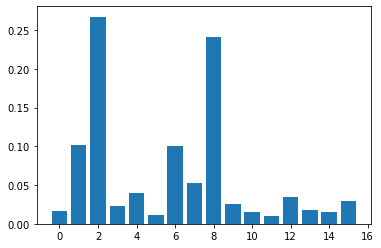

In [217]:
#model importance-random forest
model = RandomForestRegressor(bootstrap= False, max_features= 'log2', min_samples_split= 2, n_estimators= 150)
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

 0   BedroomCnt          11588 non-null  float64
 1   BathroomCnt         11588 non-null  float64
 2   FinishedSquareFeet  11588 non-null  float64
 3   GarageSquareFeet    11588 non-null  float64
 4   LotSizeSquareFeet   11588 non-null  int64  
 5   StoryCnt            11588 non-null  float64
 6   Latitude            11588 non-null  int64  
 7   Longitude           11588 non-null  int64  
 8   BGMedHomeValue      11588 non-null  float64
 9   BGMedRent           11588 non-null  float64
 10  BGPctOwn            11588 non-null  float64
 11  BGPctVacant         11588 non-null  float64
 12  BGMedIncome         11588 non-null  int64  

In [218]:
# Gradient Boosting Regression 
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train, y_train)
y_pred = GBoost.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()
print(aape) 
print(mape) 

0.11883243029818048
0.0825170818393316


In [219]:
# XGBoost
xgb = xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =5, nthread = -1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
aape = (abs(y_pred - y_test)/y_test).mean()
mape = (abs(y_pred - y_test)/y_test).median()
print(aape) 
print(mape) 


[23:35:18] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.13210257933446815
0.09024340607186482


Feature: 0, Score: 0.01044
Feature: 1, Score: 0.09341
Feature: 2, Score: 0.23889
Feature: 3, Score: 0.02120
Feature: 4, Score: 0.01713
Feature: 5, Score: 0.02344
Feature: 6, Score: 0.22115
Feature: 7, Score: 0.03131
Feature: 8, Score: 0.24010
Feature: 9, Score: 0.01891
Feature: 10, Score: 0.00820
Feature: 11, Score: 0.00293
Feature: 12, Score: 0.03822
Feature: 13, Score: 0.01084
Feature: 14, Score: 0.00582
Feature: 15, Score: 0.01802


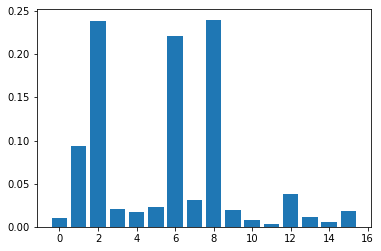

In [220]:
#model importance-GradientBoosting
model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

[23:35:57] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Feature: 0, Score: 0.02467
Feature: 1, Score: 0.12132
Feature: 2, Score: 0.18067
Feature: 3, Score: 0.02471
Feature: 4, Score: 0.04375
Feature: 5, Score: 0.02820
Feature: 6, Score: 0.09304
Feature: 7, Score: 0.04933
Feature: 8, Score: 0.24488
Feature: 9, Score: 0.01868
Feature: 10, Score: 0.02829
Feature: 11, Score: 0.02518
Feature: 12, Score: 0.02964
Feature: 13, Score: 0.02624
Feature: 14, Score: 0.02449
Feature: 15, Score: 0.03689


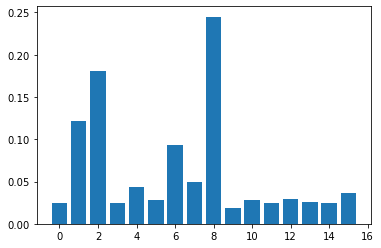

In [221]:
#model importance-XGB
model = xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =5, nthread = -1)
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
0   BedroomCnt          11588 non-null  float64
 1   BathroomCnt         11588 non-null  float64
 2   FinishedSquareFeet  11588 non-null  float64
 3   GarageSquareFeet    11588 non-null  float64
 4   LotSizeSquareFeet   11588 non-null  int64  
 5   StoryCnt            11588 non-null  float64
 6   Latitude            11588 non-null  int64  
 7   Longitude           11588 non-null  int64  
 8   BGMedHomeValue      11588 non-null  float64
 9   BGMedRent           11588 non-null  float64
 10  BGPctOwn            11588 non-null  float64
 11  BGPctVacant         11588 non-null  float64
 12  BGMedIncome         11588 non-null  int64  
 13  BGPctKids           11588 non-null  float64
 14  BGMedAge            11588 non-null  float64
 15  age                 11588 non-null  float64

____________________________________________________________________________________________________

### Modelling 4: select predictors based on model importance-GradientBoosting

In [231]:
# Dropping the'PropertyID', 'SaleDollarCnt', 'TransDate', 'BuiltYear','ZoneCodeCounty' columns
X = df_train2v3[["BathroomCnt","FinishedSquareFeet","Latitude","BGMedHomeValue","BGMedIncome"]]
y = df_train2v3['SaleDollarCnt']

X_t = df_test2v3[["BathroomCnt","FinishedSquareFeet","Latitude","BGMedHomeValue","BGMedIncome"]]

print(X.shape, y.shape, X_t.shape)

(11588, 5) (11588,) (4402, 5)


In [232]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
X_t = standard_scaler.fit_transform(X_t)

print('X shape: {}'.format(X.shape))
print('X_t shape: {}'.format(X_t.shape))

X shape: (11588, 5)
X_t shape: (4402, 5)


In [233]:
# Train-Test Separation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [234]:
# Modelling

models = []
# Linear regression
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('SGD', SGDRegressor()))
models.append(('Lasso', Lasso()))
# Ensemble methods
models.append(('RandomForest', RandomForestRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('ExtraTrees', ExtraTreesRegressor()))
# KNN
models.append(('KNN',  KNeighborsRegressor()))
# Decision Trees
models.append(('DecisionTree', DecisionTreeRegressor()))
#XGBoost
models.append(('XGBoost', XGBRegressor()))
models.append(('GradientBoost', GradientBoostingRegressor()))
models.append(('LGBM', LGBMRegressor()))

# evaluate each model in turn
results = []
names = []

In [235]:
# Report Average Absolute Percent Error (AAPE) & Absolute Percent Error (MAPE)
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        aape = (abs(y_pred - y_test)/y_test).mean()
        mape = (abs(y_pred - y_test)/y_test).median()
        msg = "%s: (%f) (%f)" % (name, aape, mape)
        print(msg)

LR: (0.262143) (0.203062)
Ridge: (0.262115) (0.203089)
SGD: (0.257942) (0.197606)
Lasso: (0.262141) (0.203062)
RandomForest: (0.143878) (0.097304)
AdaBoost: (0.877736) (0.768544)
ExtraTrees: (0.147343) (0.102167)
KNN: (0.158318) (0.111635)
DecisionTree: (0.190705) (0.128672)
XGBoost: (0.143824) (0.102318)
GradientBoost: (0.154672) (0.113338)
LGBM: (0.145394) (0.104787)


____________________________________________________________________________________________________

### Modelling 5: drop latitude & longitute

In [236]:
# Dropping the'PropertyID', 'SaleDollarCnt', 'TransDate', 'BuiltYear','ZoneCodeCounty' columns
drop_cols = ['PropertyID', 'SaleDollarCnt', 'TransDate', 'BuiltYear','ZoneCodeCounty', 'Latitude', 'Longitude']
X = df_train2v3.drop(drop_cols, axis=1)
y = df_train2v3['SaleDollarCnt']

X_t = df_test2v3.drop(drop_cols, axis=1)

print(X.shape, y.shape, X_t.shape)

(11588, 14) (11588,) (4402, 14)


In [237]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
X_t = standard_scaler.fit_transform(X_t)

print('X shape: {}'.format(X.shape))
print('X_t shape: {}'.format(X_t.shape))

X shape: (11588, 14)
X_t shape: (4402, 14)


In [238]:
# Train-Test Separation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [239]:
# Modelling

models = []
# Linear regression
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('SGD', SGDRegressor()))
models.append(('Lasso', Lasso()))
# Ensemble methods
models.append(('RandomForest', RandomForestRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('ExtraTrees', ExtraTreesRegressor()))
# KNN
models.append(('KNN',  KNeighborsRegressor()))
# Decision Trees
models.append(('DecisionTree', DecisionTreeRegressor()))
#XGBoost
models.append(('XGBoost', XGBRegressor()))
models.append(('GradientBoost', GradientBoostingRegressor()))
models.append(('LGBM', LGBMRegressor()))

# evaluate each model in turn
results = []
names = []

In [240]:
# Report Average Absolute Percent Error (AAPE) & Absolute Percent Error (MAPE)
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        aape = (abs(y_pred - y_test)/y_test).mean()
        mape = (abs(y_pred - y_test)/y_test).median()
        msg = "%s: (%f) (%f)" % (name, aape, mape)
        print(msg)

LR: (0.252722) (0.189478)
Ridge: (0.252695) (0.189501)
SGD: (0.252733) (0.190956)
Lasso: (0.252721) (0.189473)
RandomForest: (0.148279) (0.097504)
AdaBoost: (1.209831) (1.009450)
ExtraTrees: (0.147896) (0.098503)
KNN: (0.178482) (0.127572)
DecisionTree: (0.207776) (0.134720)
XGBoost: (0.149012) (0.101105)
GradientBoost: (0.172331) (0.123336)
LGBM: (0.154571) (0.108217)


In this project, we cleaned and preprocessed the data, trained regressors with different algorithms, performed hyperparameter tuning to get the best parameters, and stacked regression models. Finally, we selected the optimal model- GradientBoost. At each step of the way, we were able to enhance the performance of our model by minimizing the AAPE.